In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

In [2]:
def deg_to_rad(x):
    return x * np.pi / 180

In [3]:
def rad_to_deg(x):
    return x * 180 / np.pi

In [4]:
x = np.arange(0, 360, 1)
y = np.sin(2 * x * np.pi / 180)

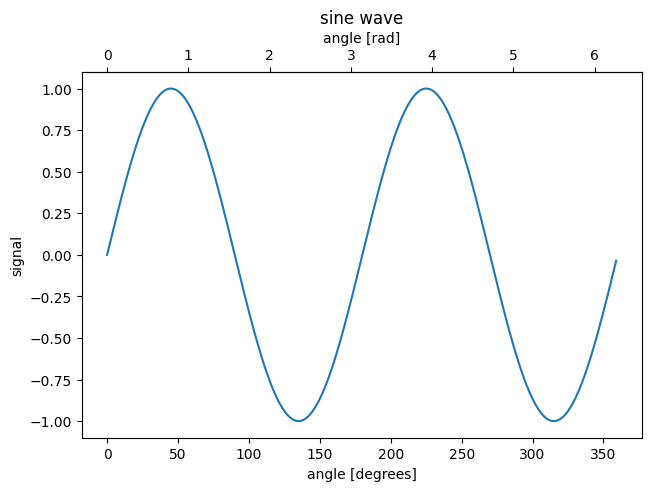

In [5]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(x, y)
ax.set_xlabel("angle [degrees]")
ax.set_ylabel("signal")
ax.set_title("sine wave")

secax = ax.secondary_xaxis("top", functions=(deg_to_rad, rad_to_deg))
secax.set_xlabel("angle [rad]")
plt.show()

In [6]:
def one_over(x):
    """vectorized 1/x, treating x==0 manually"""
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = np.inf
    x[~near_zero] = 1 / x[~near_zero]
    return x

In [7]:
np.random.seed(19753902)
x = np.arange(0.02, 1, 0.02)
y = np.random.randn(len(x)) ** 2
inverse = one_over

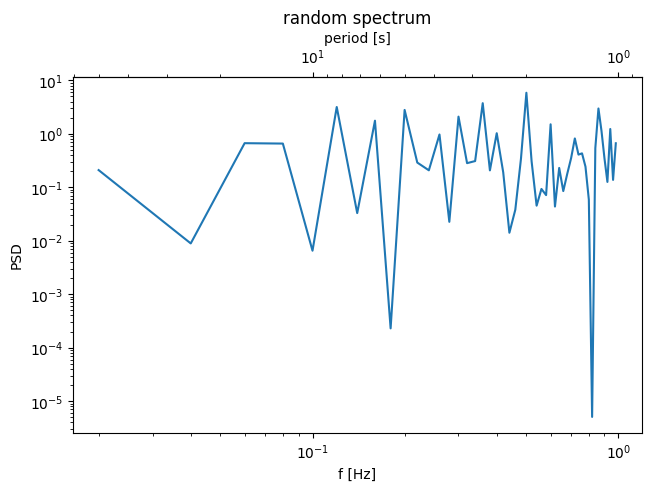

In [8]:
fig, ax = plt.subplots(constrained_layout=True)

ax.loglog(x, y)
ax.set_xlabel("f [Hz]")
ax.set_ylabel("PSD")
ax.set_title("random spectrum")

secax = ax.secondary_xaxis("top", functions=(one_over, inverse))
secax.set_xlabel("period [s]")
plt.show()

In [9]:
xdata = np.arange(1, 11, 0.4)
ydata = np.random.randn(len(xdata))
xold = np.arange(0, 11, 0.2)
xnew = np.sort(10 * np.exp(-xold / 4) + np.random.randn(len(xold)) / 3)

In [10]:
def forward(x):
    return np.interp(x, xold, xnew)

In [11]:
def inverse(x):
    return np.interp(x, xnew, xold)

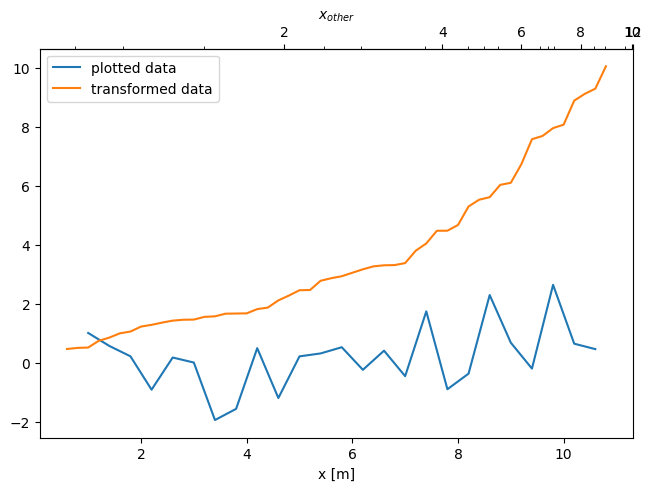

In [12]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(xdata, ydata, label="plotted data")
ax.plot(xold[3:], xnew[3:], label="transformed data")
ax.set_xlabel("x [m]")
ax.legend()

secax = ax.secondary_xaxis("top", functions=(forward, inverse))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel("$x_{other}$")

plt.show()

In [13]:
def date_to_yday(x):
    """Convert matplotlib datenum to days since 2018-01-01."""
    y = x - mdates.date2num(datetime.datetime(2018, 1, 1))
    return y

In [14]:
def yday_to_date(x):
    """Return a matplotlib datenum for *x* days after 2018-01-01."""
    y = x + mdates.date2num(datetime.datetime(2018, 1, 1))
    return y

In [15]:
def celcius_to_fahrenheit(x):
    return x * 1.8 + 32

In [16]:
def fahrenheit_to_celcius(x):
    return (x - 32) / 1.8

In [17]:
dates = [
    datetime.datetime(2018, 1, 1) + datetime.timedelta(hours=k * 6) for k in range(240)
]

temperature = np.random.randn(len(dates)) * 4 + 6.7

In [18]:
def celcius_to_anomaly(x):
    return (x - np.mean(temperature))

In [19]:
def anomaly_to_celcius(x):
    return (x + np.mean(temperature))

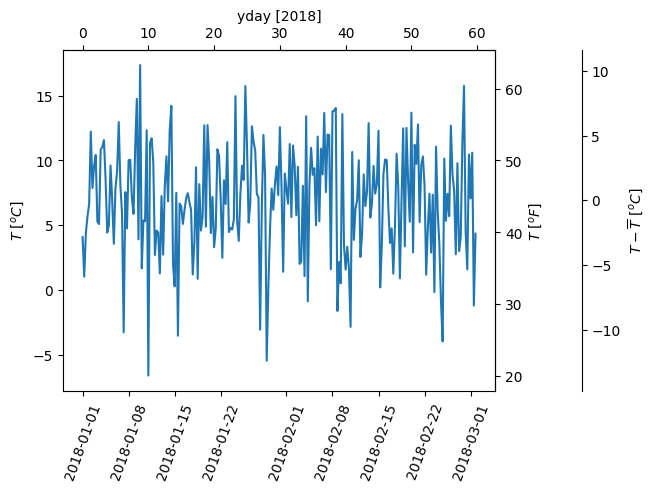

In [20]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(dates, temperature)
ax.set_ylabel(r"$T\ [^oC]$")
plt.xticks(rotation=70)

secax_x = ax.secondary_xaxis("top", functions=(date_to_yday, yday_to_date))
secax_x.set_xlabel("yday [2018]")

secax_y = ax.secondary_yaxis("right", functions=(celcius_to_fahrenheit, fahrenheit_to_celcius))
secax_y.set_ylabel(r"$T\ [^oF]$")

secax_y2 = ax.secondary_yaxis(1.2, functions=(celcius_to_anomaly, anomaly_to_celcius))
secax_y2.set_ylabel(r"$T - \overline{T}\ [^oC]$")

plt.show()